In [37]:
import numpy as np
import pandas as pd
%matplotlib inline

**handling missing values in dataset**

In [2]:
df = pd.read_csv("datasets/weather_m4.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YYYYMMDD         8784 non-null   int64  
 1   TIME             8784 non-null   int64  
 2   TEMP             8784 non-null   int64  
 3   MIN_TEMP_GROUND  1464 non-null   float64
 4   PRESSURE         8784 non-null   int64  
 5   HUMIDITY         8784 non-null   int64  
 6   VIEW_RANGE       8743 non-null   float64
 7   CLOUD            8743 non-null   float64
 8   MIST             8741 non-null   float64
 9   RAIN             8741 non-null   float64
 10  SNOW             8741 non-null   float64
 11  THUNDER          8741 non-null   float64
 12  ICE              8741 non-null   float64
 13  WEATHER_CODE     3862 non-null   float64
dtypes: float64(9), int64(5)
memory usage: 960.9 KB


In [3]:
df.head(10)

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
0,20160101,1,68,NaN,10207,87,56.0,4.0,0.0,0.0,0.0,0.0,0.0,10.0
1,20160101,2,58,NaN,10214,92,57.0,2.0,0.0,0.0,0.0,0.0,0.0,10.0
2,20160101,3,57,NaN,10220,92,56.0,7.0,0.0,1.0,0.0,0.0,0.0,23.0
3,20160101,4,60,NaN,10225,93,57.0,7.0,0.0,1.0,0.0,0.0,0.0,51.0
4,20160101,5,45,NaN,10230,95,56.0,7.0,0.0,1.0,0.0,0.0,0.0,22.0
5,20160101,6,20,3.0,10237,99,9.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0
6,20160101,7,11,NaN,10242,99,5.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0
7,20160101,8,7,NaN,10245,100,1.0,0.0,1.0,0.0,0.0,0.0,1.0,34.0
8,20160101,9,2,NaN,10248,99,2.0,0.0,1.0,0.0,0.0,0.0,1.0,32.0
9,20160101,10,20,NaN,10249,100,5.0,0.0,1.0,0.0,0.0,0.0,0.0,32.0


In [4]:
df.isnull()
#returns boolean dataframe

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,False,False,False,True,False,False,False,False,False,False,False,False,False,False
8780,False,False,False,True,False,False,False,False,False,False,False,False,False,False
8781,False,False,False,True,False,False,False,False,False,False,False,False,False,False
8782,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().any()

YYYYMMDD           False
TIME               False
TEMP               False
MIN_TEMP_GROUND     True
PRESSURE           False
HUMIDITY           False
VIEW_RANGE          True
CLOUD               True
MIST                True
RAIN                True
SNOW                True
THUNDER             True
ICE                 True
WEATHER_CODE        True
dtype: bool

In [6]:
df.isnull().any(axis= 1)
#false if any col has missing value in row

0        True
1        True
2        True
3        True
4        True
        ...  
8779     True
8780     True
8781     True
8782     True
8783    False
Length: 8784, dtype: bool

In [7]:
#if any col has all null values

df.isnull().all()

YYYYMMDD           False
TIME               False
TEMP               False
MIN_TEMP_GROUND    False
PRESSURE           False
HUMIDITY           False
VIEW_RANGE         False
CLOUD              False
MIST               False
RAIN               False
SNOW               False
THUNDER            False
ICE                False
WEATHER_CODE       False
dtype: bool

In [8]:
df.isnull().all(axis= 1).any()
#if there is any row that has all null values

False

In [9]:
#returns true if there is not null val

df.notnull().all()

YYYYMMDD            True
TIME                True
TEMP                True
MIN_TEMP_GROUND    False
PRESSURE            True
HUMIDITY            True
VIEW_RANGE         False
CLOUD              False
MIST               False
RAIN               False
SNOW               False
THUNDER            False
ICE                False
WEATHER_CODE       False
dtype: bool

In [10]:
df['MIN_TEMP_GROUND']

#recorded every 6 hrs

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
8779     NaN
8780     NaN
8781     NaN
8782     NaN
8783    26.0
Name: MIN_TEMP_GROUND, Length: 8784, dtype: float64

In [11]:
every_6th_row = pd.Series(range(5,len(df), 6))

In [12]:
df['MIN_TEMP_GROUND'][every_6th_row]

5        3.0
11     -17.0
17      47.0
23      47.0
29      48.0
        ... 
8759    32.0
8765    29.0
8771    29.0
8777    37.0
8783    26.0
Name: MIN_TEMP_GROUND, Length: 1464, dtype: float64

In [13]:
df['MIN_TEMP_GROUND'][every_6th_row].notnull().all()

True

In [14]:
df['MIN_TEMP_GROUND'].drop(every_6th_row).isnull().all()

True

In [15]:
df.loc[:, 'MIN_TEMP_GROUND'].drop(every_6th_row).isnull().all()

True

In [16]:
# dropping columns

df.drop(columns= 'WEATHER_CODE')
#only creates view; inorder to drop column in original dataset use inplace 

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
0,20160101,1,68,NaN,10207,87,56.0,4.0,0.0,0.0,0.0,0.0,0.0
1,20160101,2,58,NaN,10214,92,57.0,2.0,0.0,0.0,0.0,0.0,0.0
2,20160101,3,57,NaN,10220,92,56.0,7.0,0.0,1.0,0.0,0.0,0.0
3,20160101,4,60,NaN,10225,93,57.0,7.0,0.0,1.0,0.0,0.0,0.0
4,20160101,5,45,NaN,10230,95,56.0,7.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,20161231,20,35,NaN,10265,98,11.0,8.0,1.0,0.0,0.0,0.0,0.0
8780,20161231,21,34,NaN,10258,98,9.0,9.0,1.0,0.0,0.0,0.0,0.0
8781,20161231,22,30,NaN,10253,98,9.0,9.0,1.0,1.0,0.0,0.0,0.0
8782,20161231,23,28,NaN,10246,98,6.0,9.0,1.0,1.0,0.0,0.0,0.0


In [17]:
df.drop(columns= 'WEATHER_CODE', inplace= True)

In [18]:
#fill forward

df['MIN_TEMP_GROUND'].fillna(method= 'ffill')


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
8779    37.0
8780    37.0
8781    37.0
8782    37.0
8783    26.0
Name: MIN_TEMP_GROUND, Length: 8784, dtype: float64

In [19]:
#fill backward

df['MIN_TEMP_GROUND'].fillna(method= 'bfill', inplace= True)

In [20]:
df[df.isnull().any(axis= 1)]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5306,20160809,3,115,95.0,10207,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5307,20160809,4,107,95.0,10206,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5308,20160809,5,104,95.0,10210,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5309,20160809,6,115,95.0,10210,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5310,20160809,7,125,110.0,10211,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5311,20160809,8,144,110.0,10217,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5312,20160809,9,148,110.0,10222,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5313,20160809,10,156,110.0,10228,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5314,20160809,11,153,110.0,10230,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5315,20160809,12,161,110.0,10231,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.loc[df.isnull().any(axis=1), 'YYYYMMDD'].value_counts()

20160821    20
20160809    12
20160822    11
Name: YYYYMMDD, dtype: int64

In [22]:
nulls_dropped = df.dropna()
nulls_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8741 entries, 0 to 8783
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YYYYMMDD         8741 non-null   int64  
 1   TIME             8741 non-null   int64  
 2   TEMP             8741 non-null   int64  
 3   MIN_TEMP_GROUND  8741 non-null   float64
 4   PRESSURE         8741 non-null   int64  
 5   HUMIDITY         8741 non-null   int64  
 6   VIEW_RANGE       8741 non-null   float64
 7   CLOUD            8741 non-null   float64
 8   MIST             8741 non-null   float64
 9   RAIN             8741 non-null   float64
 10  SNOW             8741 non-null   float64
 11  THUNDER          8741 non-null   float64
 12  ICE              8741 non-null   float64
dtypes: float64(8), int64(5)
memory usage: 956.0 KB


In [23]:
nulls_dropped[5300:5310]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5300,20160808,21,131,124.0,10211,96,65.0,8.0,0.0,0.0,0.0,0.0,0.0
5301,20160808,22,133,124.0,10209,97,65.0,8.0,0.0,0.0,0.0,0.0,0.0
5302,20160808,23,135,124.0,10209,96,65.0,8.0,0.0,0.0,0.0,0.0,0.0
5303,20160808,24,136,124.0,10208,94,65.0,8.0,0.0,0.0,0.0,0.0,0.0
5304,20160809,1,141,95.0,10205,89,70.0,8.0,0.0,0.0,0.0,0.0,0.0
5305,20160809,2,123,95.0,10199,92,65.0,1.0,0.0,0.0,0.0,1.0,0.0
5318,20160809,15,143,135.0,10234,85,59.0,8.0,0.0,1.0,0.0,0.0,0.0
5319,20160809,16,160,135.0,10231,65,80.0,2.0,0.0,1.0,0.0,0.0,0.0
5320,20160809,17,156,135.0,10231,62,80.0,0.0,0.0,0.0,0.0,0.0,0.0
5321,20160809,18,140,135.0,10227,72,75.0,1.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#thresh allows to determine how many values must be present in a row to keep it

drop_thresh = df.dropna(thresh= 7) # drop rows that have less than 7 measurements
drop_thresh[drop_thresh.isnull().any(axis=1)]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5317,20160809,14,167,135.0,10233,65,80.0,2.0,NaN,NaN,NaN,NaN,NaN
5626,20160822,11,193,175.0,10233,88,65.0,8.0,NaN,NaN,NaN,NaN,NaN


In [28]:
df[['RAIN', 'SNOW']].fillna(0)

,RAIN,SNOW
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
8779,0.0,0.0
8780,0.0,0.0
8781,1.0,0.0
8782,1.0,0.0


In [30]:
rows_to_fill = df.isnull().any(axis= 1)
df[rows_to_fill]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5306,20160809,3,115,95.0,10207,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5307,20160809,4,107,95.0,10206,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5308,20160809,5,104,95.0,10210,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5309,20160809,6,115,95.0,10210,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5310,20160809,7,125,110.0,10211,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5311,20160809,8,144,110.0,10217,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5312,20160809,9,148,110.0,10222,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5313,20160809,10,156,110.0,10228,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5314,20160809,11,153,110.0,10230,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5315,20160809,12,161,110.0,10231,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#fill mean values

nulls_filled = df.fillna(df.mean())

In [33]:
nulls_filled[rows_to_fill]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5306,20160809,3,115,95.0,10207,90,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5307,20160809,4,107,95.0,10206,93,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5308,20160809,5,104,95.0,10210,80,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5309,20160809,6,115,95.0,10210,80,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5310,20160809,7,125,110.0,10211,70,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5311,20160809,8,144,110.0,10217,75,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5312,20160809,9,148,110.0,10222,70,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5313,20160809,10,156,110.0,10228,70,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5314,20160809,11,153,110.0,10230,65,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5315,20160809,12,161,110.0,10231,60,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016


In [35]:
df.fillna(df.mode().iloc[0], inplace= True)

**handling unwanted data: outliers and duplicates**

**1. removing outliers**

In [36]:
athletes = pd.read_csv('datasets/athletes.csv')
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             11538 non-null  int64  
 1   name           11538 non-null  object 
 2   nationality    11538 non-null  object 
 3   sex            11538 non-null  object 
 4   date_of_birth  11538 non-null  object 
 5   height         11208 non-null  float64
 6   weight         10879 non-null  float64
 7   sport          11538 non-null  object 
 8   gold           11538 non-null  int64  
 9   silver         11538 non-null  int64  
 10  bronze         11538 non-null  int64  
 11  info           131 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.1+ MB


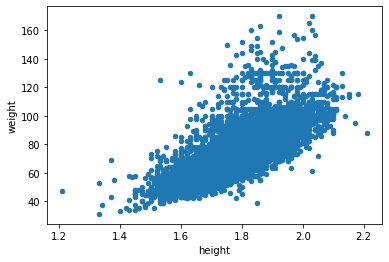

In [38]:
athletes.plot.scatter(x= 'height', y= 'weight')

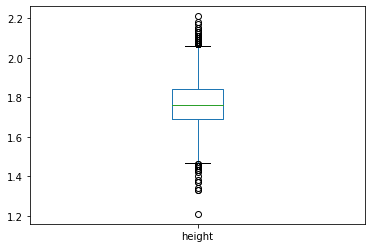

In [40]:
heights = athletes['height']
heights.plot.box()

In [43]:
q1 = heights.quantile(.25)
q3 = heights.quantile(.75)
iqr = q3 - q1
pmax = q3 + 1.5*iqr
pmin = q1 - 1.5*iqr
nwh = heights.where(heights.between(pmin, pmax)) 
#heights with outliers replaced with null values

,before,after
count,11208.000000,11116.000000
mean,1.766282,1.765085
std,0.112719,0.108882
min,1.210000,1.470000
25%,1.690000,1.690000
50%,1.760000,1.760000
75%,1.840000,1.840000
max,2.210000,2.060000


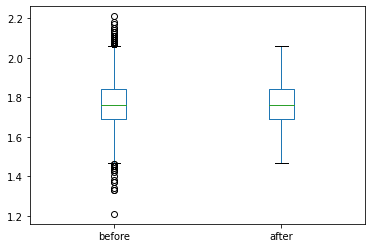

In [45]:
#comparing dataframes with and without outliers

compare = pd.DataFrame({'before': heights, 'after': nwh})
compare.plot.box()
compare.describe()

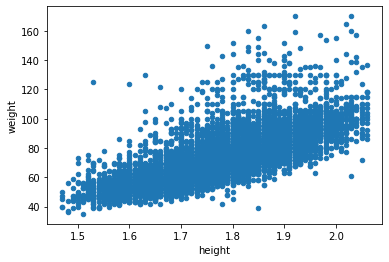

In [47]:
heights.where(heights.between(pmin, pmax), inplace= True)
#change in original dataset 

athletes.plot.scatter(x= 'height', y= 'weight')

**2. removing duplicates**

In [55]:
#check if there is any duplicate data
athletes.duplicated().any()

False

In [59]:
#to view duplicate values

athletes[athletes.duplicated()]

#to remove duplicates

athletes.drop_duplicates(inplace= True)

athletes.duplicated().any()

False

In [65]:
#to view unique countries name 

athletes['nationality'].drop_duplicates().sort_values() #returns dataframe
#athletes['nationality'].unique() #returns numpy array

51      AFG
1630    ALB
27      ALG
3161    AND
275     ANG
       ... 
4196    VIE
1589    VIN
7696    YEM
1440    ZAM
831     ZIM
Name: nationality, Length: 207, dtype: object

In [66]:
#count how many times it occurs withih dataset

athletes['nationality'].value_counts()

USA    567
BRA    485
GER    441
AUS    431
FRA    410
      ... 
BHU      2
NRU      2
LBR      2
MTN      2
TUV      1
Name: nationality, Length: 207, dtype: int64

In [67]:
athletes['sex'].value_counts()

male      6333
female    5205
Name: sex, dtype: int64

**type conversions**

In [68]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11538 entries, 0 to 11537
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             11538 non-null  int64  
 1   name           11538 non-null  object 
 2   nationality    11538 non-null  object 
 3   sex            11538 non-null  object 
 4   date_of_birth  11538 non-null  object 
 5   height         11116 non-null  float64
 6   weight         10879 non-null  float64
 7   sport          11538 non-null  object 
 8   gold           11538 non-null  int64  
 9   silver         11538 non-null  int64  
 10  bronze         11538 non-null  int64  
 11  info           131 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.1+ MB


In [74]:
athletes[['gold', 'silver', 'bronze']] = athletes[['gold', 'silver', 'bronze']].astype(int)
athletes[['gold', 'silver', 'bronze']].sum()

gold      666
silver    655
bronze    704
dtype: int64

*NOTE: only objects and float64 can contain null values*

**fixing indices**

In [75]:
athletes.head()

,id,name,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze,info
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,NaN
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,NaN
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,NaN
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,NaN
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,NaN


In [77]:
athletes.set_index('id', drop=True, inplace= True)
athletes.head()

,name,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze,info
id,,,,,,,,,,,
736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,NaN
532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,NaN
435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,NaN
521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,NaN
33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,NaN


In [78]:
#changing col names

athletes.rename(
columns= {'nationality': 'country', 'sport': 'discipline'},
inplace= True)
athletes.head()

,name,country,sex,date_of_birth,height,weight,discipline,gold,silver,bronze,info
id,,,,,,,,,,,
736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,NaN
532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,NaN
435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,NaN
521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,NaN
33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,NaN


In [80]:
df = pd.read_csv("datasets/weather_m4.csv")
df.dropna(inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831 entries, 5 to 8783
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YYYYMMDD         831 non-null    int64  
 1   TIME             831 non-null    int64  
 2   TEMP             831 non-null    int64  
 3   MIN_TEMP_GROUND  831 non-null    float64
 4   PRESSURE         831 non-null    int64  
 5   HUMIDITY         831 non-null    int64  
 6   VIEW_RANGE       831 non-null    float64
 7   CLOUD            831 non-null    float64
 8   MIST             831 non-null    float64
 9   RAIN             831 non-null    float64
 10  SNOW             831 non-null    float64
 11  THUNDER          831 non-null    float64
 12  ICE              831 non-null    float64
 13  WEATHER_CODE     831 non-null    float64
dtypes: float64(9), int64(5)
memory usage: 97.4 KB


In [81]:
df.head()

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
5,20160101,6,20,3.0,10237,99,9.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0
11,20160101,12,79,-17.0,10239,84,70.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
17,20160101,18,49,47.0,10194,98,17.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
29,20160102,6,53,48.0,10089,88,62.0,8.0,0.0,1.0,0.0,0.0,0.0,57.0
35,20160102,12,63,47.0,10071,94,57.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0


In [82]:
#removing gaps in index

df.reset_index()

,index,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
0,5,20160101,6,20,3.0,10237,99,9.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0
1,11,20160101,12,79,-17.0,10239,84,70.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,17,20160101,18,49,47.0,10194,98,17.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
3,29,20160102,6,53,48.0,10089,88,62.0,8.0,0.0,1.0,0.0,0.0,0.0,57.0
4,35,20160102,12,63,47.0,10071,94,57.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,8759,20161230,24,40,32.0,10340,93,37.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
827,8765,20161231,6,29,29.0,10326,99,3.0,9.0,1.0,0.0,0.0,0.0,0.0,33.0
828,8771,20161231,12,45,29.0,10307,98,21.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
829,8777,20161231,18,37,37.0,10277,98,8.0,9.0,1.0,0.0,0.0,0.0,0.0,34.0


In [83]:
df.reset_index(drop= True)

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
0,20160101,6,20,3.0,10237,99,9.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0
1,20160101,12,79,-17.0,10239,84,70.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,20160101,18,49,47.0,10194,98,17.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
3,20160102,6,53,48.0,10089,88,62.0,8.0,0.0,1.0,0.0,0.0,0.0,57.0
4,20160102,12,63,47.0,10071,94,57.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,20161230,24,40,32.0,10340,93,37.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
827,20161231,6,29,29.0,10326,99,3.0,9.0,1.0,0.0,0.0,0.0,0.0,33.0
828,20161231,12,45,29.0,10307,98,21.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
829,20161231,18,37,37.0,10277,98,8.0,9.0,1.0,0.0,0.0,0.0,0.0,34.0
